# Laboratory 2

## Data visualisation: Projection models (Manifold learning)

### Part I. Swiss-roll dataset

Swiss Roll: data is essentially a rectangle, but
              has been "rolled up" like a swiss roll
              in three dimensional space. Ideally a
              dimension reduction technique should
              be able to "unroll" it. The data
              has been coloured according to one dimension
              of the rectangle, so should form
              a rectangle of smooth color variation.

1. Generate the swis-roll dataset with 2000 points using the function
datasets.make_swiss_roll

In [56]:
from sklearn.datasets import make_swiss_roll
swissroll, swissroll_labels = make_swiss_roll(
    n_samples=1000, noise=0.1, random_state=42
)

2. Apply the PCA and plot the data.


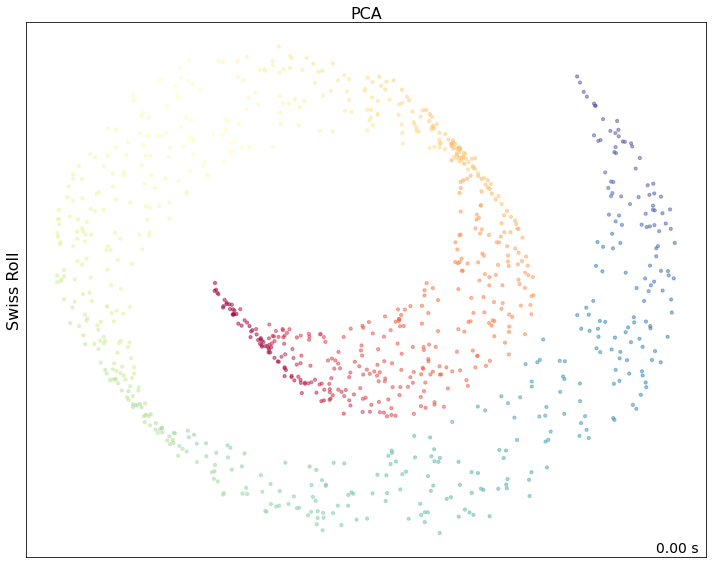

In [57]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import time
import numpy as np


reducers = [(PCA, {})]
test_data = [(swissroll, swissroll_labels)]
dataset_names = ["Swiss Roll"]
n_rows = len(test_data)
n_cols = len(reducers)
ax_index = 1
ax_list = []

plt.figure(figsize=(10, 8))
plt.subplots_adjust(
    left=0.02, right=0.98, bottom=0.001, top=0.96, wspace=0.05, hspace=0.01
)
for data, labels in test_data:
    for reducer, args in reducers:
        start_time = time.time()
        embedding = reducer(n_components=2, **args).fit_transform(data)
        elapsed_time = time.time() - start_time
        ax = plt.subplot(n_rows, n_cols, ax_index)
        if isinstance(labels[0], tuple):
            ax.scatter(*embedding.T, s=10, c=labels, alpha=0.5)
        else:
            ax.scatter(*embedding.T, s=10, c=labels, cmap="Spectral", alpha=0.5)
        ax.text(
            0.99,
            0.01,
            "{:.2f} s".format(elapsed_time),
            transform=ax.transAxes,
            size=14,
            horizontalalignment="right",
        )
        ax_list.append(ax)
        ax_index += 1
plt.setp(ax_list, xticks=[], yticks=[])

for i in np.arange(n_rows) * n_cols:
    ax_list[i].set_ylabel(dataset_names[i // n_cols], size=16)
for i in range(n_cols):
    ax_list[i].set_xlabel(repr(reducers[i][0]()).split("(")[0], size=16)
    ax_list[i].xaxis.set_label_position("top")

plt.tight_layout()
plt.show()


3. Apply LLE (Local Linear Embedding) with 5 neighbours
(manifold.locally_linear_embedding) by printing the error. Change the number
of neighbours from 2 to 15 and plot the error line. Which is the best number of
neighbours ?

2.1003887294884797e-10


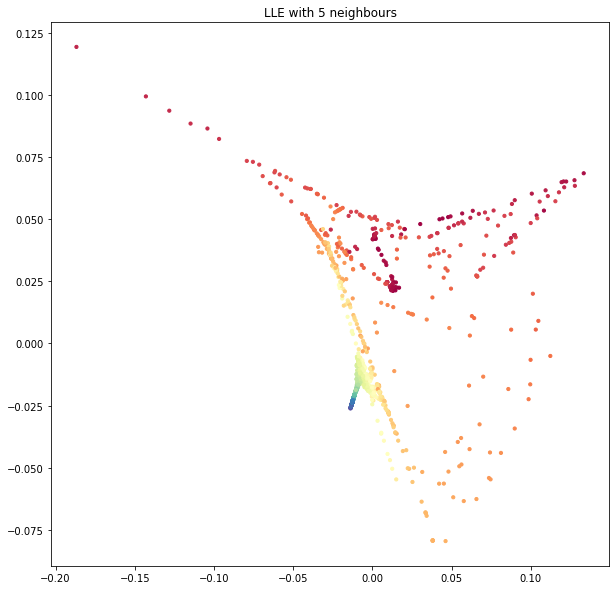

In [58]:
from sklearn.manifold import LocallyLinearEmbedding
embedding = LocallyLinearEmbedding(n_neighbors=5, n_components=2)
X_transformed = embedding.fit_transform(swissroll)
print(embedding.reconstruction_error_)
plt.figure(figsize=(10, 10))
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=swissroll_labels, s=10, cmap=plt.cm.get_cmap('Spectral'))
plt.title("LLE with 5 neighbours")
plt.show()

In [59]:
error =np.Infinity
error_list = []
nr_of_neighbors = []
for n_neighbors in range(2, 15):
    embedding = LocallyLinearEmbedding(n_neighbors=n_neighbors, eigen_solver='dense')
    X_lle = embedding.fit_transform(swissroll)
    if embedding.reconstruction_error_ < error:
        error = embedding.reconstruction_error_
    error_list.append(embedding.reconstruction_error_)
    nr_of_neighbors.append(n_neighbors)


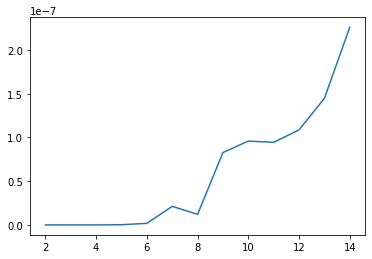

In [60]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(nr_of_neighbors, error_list)
plt.show()

In [61]:
print(error_list)
print(nr_of_neighbors)
print("The smallest error is ",min(error_list))

[8.687158318203206e-16, -4.916067096633607e-15, -1.6463563334324976e-15, 2.1003380582384244e-10, 1.832064877865863e-09, 2.1224234923719744e-08, 1.2123302673409451e-08, 8.276932292443444e-08, 9.58917127448764e-08, 9.445551602821132e-08, 1.0873843040993794e-07, 1.4476951301413483e-07, 2.260884450224833e-07]
[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
The smallest error is  -4.916067096633607e-15


The best number of neighbors is 3.

4. Use Multi Dimensional Scaling with manifold.MDS and visualize the dataset
in 2 dimension.

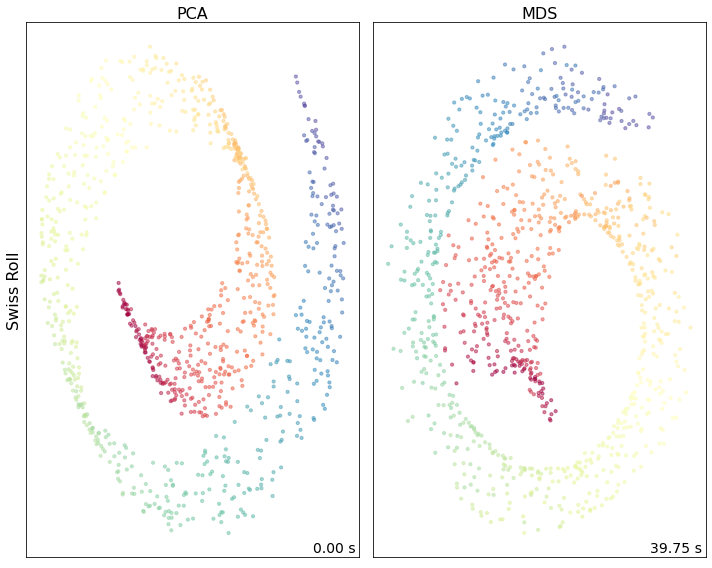

In [62]:
from sklearn.manifold import MDS

reducers = [(PCA, {}),
        (MDS, {}),
]
test_data = [(swissroll, swissroll_labels)]
dataset_names = ["Swiss Roll"]
n_rows = len(test_data)
n_cols = len(reducers)
ax_index = 1
ax_list = []

plt.figure(figsize=(10, 8))
plt.subplots_adjust(
    left=0.02, right=0.98, bottom=0.001, top=0.96, wspace=0.05, hspace=0.01
)
for data, labels in test_data:
    for reducer, args in reducers:
        start_time = time.time()
        embedding = reducer(n_components=2, **args).fit_transform(data)
        elapsed_time = time.time() - start_time
        ax = plt.subplot(n_rows, n_cols, ax_index)
        if isinstance(labels[0], tuple):
            ax.scatter(*embedding.T, s=10, c=labels, alpha=0.5)
        else:
            ax.scatter(*embedding.T, s=10, c=labels, cmap="Spectral", alpha=0.5)
        ax.text(
            0.99,
            0.01,
            "{:.2f} s".format(elapsed_time),
            transform=ax.transAxes,
            size=14,
            horizontalalignment="right",
        )
        ax_list.append(ax)
        ax_index += 1
plt.setp(ax_list, xticks=[], yticks=[])

for i in np.arange(n_rows) * n_cols:
    ax_list[i].set_ylabel(dataset_names[i // n_cols], size=16)
for i in range(n_cols):
    ax_list[i].set_xlabel(repr(reducers[i][0]()).split("(")[0], size=16)
    ax_list[i].xaxis.set_label_position("top")

plt.tight_layout()
plt.show()

5. Apply t-SNE model to the same dataset with manifold.TSNE.
Visualize the dataset.

C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


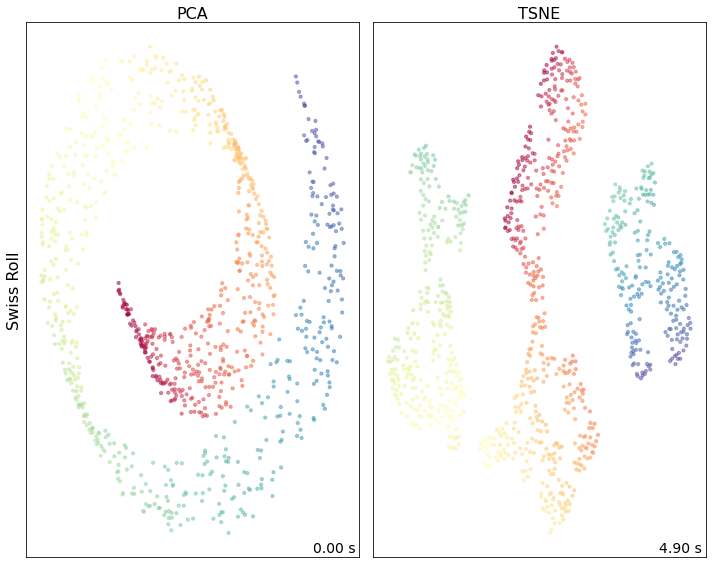

In [63]:
from sklearn.manifold import TSNE

reducers = [(PCA, {}),
        (TSNE, {"perplexity": 50}),
]
test_data = [(swissroll, swissroll_labels)]
dataset_names = ["Swiss Roll"]
n_rows = len(test_data)
n_cols = len(reducers)
ax_index = 1
ax_list = []

plt.figure(figsize=(10, 8))
plt.subplots_adjust(
    left=0.02, right=0.98, bottom=0.001, top=0.96, wspace=0.05, hspace=0.01
)
for data, labels in test_data:
    for reducer, args in reducers:
        start_time = time.time()
        embedding = reducer(n_components=2, **args).fit_transform(data)
        elapsed_time = time.time() - start_time
        ax = plt.subplot(n_rows, n_cols, ax_index)
        if isinstance(labels[0], tuple):
            ax.scatter(*embedding.T, s=10, c=labels, alpha=0.5)
        else:
            ax.scatter(*embedding.T, s=10, c=labels, cmap="Spectral", alpha=0.5)
        ax.text(
            0.99,
            0.01,
            "{:.2f} s".format(elapsed_time),
            transform=ax.transAxes,
            size=14,
            horizontalalignment="right",
        )
        ax_list.append(ax)
        ax_index += 1
plt.setp(ax_list, xticks=[], yticks=[])

for i in np.arange(n_rows) * n_cols:
    ax_list[i].set_ylabel(dataset_names[i // n_cols], size=16)
for i in range(n_cols):
    ax_list[i].set_xlabel(repr(reducers[i][0]()).split("(")[0], size=16)
    ax_list[i].xaxis.set_label_position("top")

plt.tight_layout()
plt.show()

6. Conclude and give the details of the best model.

## Part II. Digit dataset


Import the digit dataset containing only 6 classes :
digits = datasets.load_digits(n_class=6)
Follow the tutorial :
https://scikit-learn.org/dev/auto_examples/manifold/plot_lle_digits.html

In [65]:
from sklearn.datasets import load_digits
digits = load_digits(n_class=6)


In [66]:
X, y = digits.data, digits.target
n_samples, n_features = X.shape
n_neighbors = 30

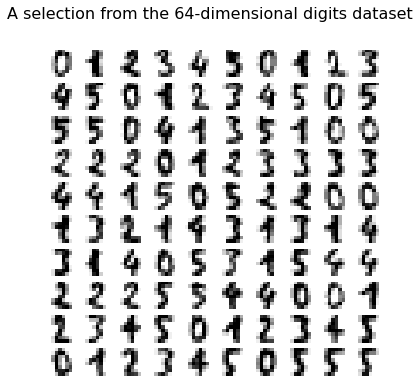

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(6, 6))
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(X[idx].reshape((8, 8)), cmap=plt.cm.binary)
    ax.axis("off")
_ = fig.suptitle("A selection from the 64-dimensional digits dataset", fontsize=16) 

Below, we will use different techniques to embed the digits dataset. We will plot the projection of the original data onto each embedding. It will allow us to check whether or digits are grouped together in the embedding space, or scattered across it.

In [ ]:
import numpy as np
from matplotlib import offsetbox
from sklearn.preprocessing import MinMaxScaler


def plot_embedding(X, title, ax):
    X = MinMaxScaler().fit_transform(X)
    for digit in digits.target_names:
        ax.scatter(
            *X[y == digit].T,
            marker=f"${digit}$",
            s=60,
            color=plt.cm.Dark2(digit),
            alpha=0.425,
            zorder=2,
        )
    shown_images = np.array([[1.0, 1.0]])  # just something big
    for i in range(X.shape[0]):
        # plot every digit on the embedding
        # show an annotation box for a group of digits
        dist = np.sum((X[i] - shown_images) ** 2, 1)
        if np.min(dist) < 4e-3:
            # don't show points that are too close
            continue
        shown_images = np.concatenate([shown_images, [X[i]]], axis=0)
        imagebox = offsetbox.AnnotationBbox(
            offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r), X[i]
        )
        imagebox.set(zorder=1)
        ax.add_artist(imagebox)

    ax.set_title(title)
    ax.axis("off")

Below, we compare different techniques. However, there are a couple of things to note:

the RandomTreesEmbedding is not technically a manifold embedding method, as it learn a high-dimensional representation on which we apply a dimensionality reduction method. However, it is often useful to cast a dataset into a representation in which the classes are linearly-separable.

the LinearDiscriminantAnalysis and the NeighborhoodComponentsAnalysis, are supervised dimensionality reduction method, i.e. they make use of the provided labels, contrary to other methods.

the TSNE is initialized with the embedding that is generated by PCA in this example. It ensures global stability of the embedding, i.e., the embedding does not depend on random initialization.

In [ ]:
from sklearn.decomposition import TruncatedSVD
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomTreesEmbedding
from sklearn.manifold import (
    Isomap,
    LocallyLinearEmbedding,
    MDS,
    SpectralEmbedding,
    TSNE,
)
from sklearn.neighbors import NeighborhoodComponentsAnalysis
from sklearn.pipeline import make_pipeline
from sklearn.random_projection import SparseRandomProjection

embeddings = {
    "Random projection embedding": SparseRandomProjection(
        n_components=2, random_state=42
    ),
    "Truncated SVD embedding": TruncatedSVD(n_components=2),
    "Linear Discriminant Analysis embedding": LinearDiscriminantAnalysis(
        n_components=2
    ),
    "Isomap embedding": Isomap(n_neighbors=n_neighbors, n_components=2),
    "Standard LLE embedding": LocallyLinearEmbedding(
        n_neighbors=n_neighbors, n_components=2, method="standard"
    ),
    "Modified LLE embedding": LocallyLinearEmbedding(
        n_neighbors=n_neighbors, n_components=2, method="modified"
    ),
    "Hessian LLE embedding": LocallyLinearEmbedding(
        n_neighbors=n_neighbors, n_components=2, method="hessian"
    ),
    "LTSA LLE embedding": LocallyLinearEmbedding(
        n_neighbors=n_neighbors, n_components=2, method="ltsa"
    ),
    "MDS embedding": MDS(n_components=2, n_init=1, max_iter=120, n_jobs=2),
    "Random Trees embedding": make_pipeline(
        RandomTreesEmbedding(n_estimators=200, max_depth=5, random_state=0),
        TruncatedSVD(n_components=2),
    ),
    "Spectral embedding": SpectralEmbedding(
        n_components=2, random_state=0, eigen_solver="arpack"
    ),
    "t-SNE embeedding": TSNE(
        n_components=2,
        init="pca",
        learning_rate="auto",
        n_iter=500,
        n_iter_without_progress=150,
        n_jobs=2,
        random_state=0,
    ),
    "NCA embedding": NeighborhoodComponentsAnalysis(
        n_components=2, init="pca", random_state=0
    ),
}

Once we declared all the methodes of interest, we can run and perform the projection of the original data. We will store the projected data as well as the computational time needed to perform each projection.

In [ ]:
from time import time

projections, timing = {}, {}
for name, transformer in embeddings.items():
    if name.startswith("Linear Discriminant Analysis"):
        data = X.copy()
        data.flat[:: X.shape[1] + 1] += 0.01  # Make X invertible
    else:
        data = X

    print(f"Computing {name}...")
    start_time = time()
    projections[name] = transformer.fit_transform(data, y)
    timing[name] = time() - start_time

Computing Random projection embedding...
Computing Truncated SVD embedding...
Computing Linear Discriminant Analysis embedding...
Computing Isomap embedding...
Computing Standard LLE embedding...
Computing Modified LLE embedding...
Computing Hessian LLE embedding...
Computing LTSA LLE embedding...
Computing MDS embedding...
Computing Random Trees embedding...
Computing Spectral embedding...
Computing t-SNE embeedding...


C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


Computing NCA embedding...


Finally, we can plot the resulting projection given by each method.

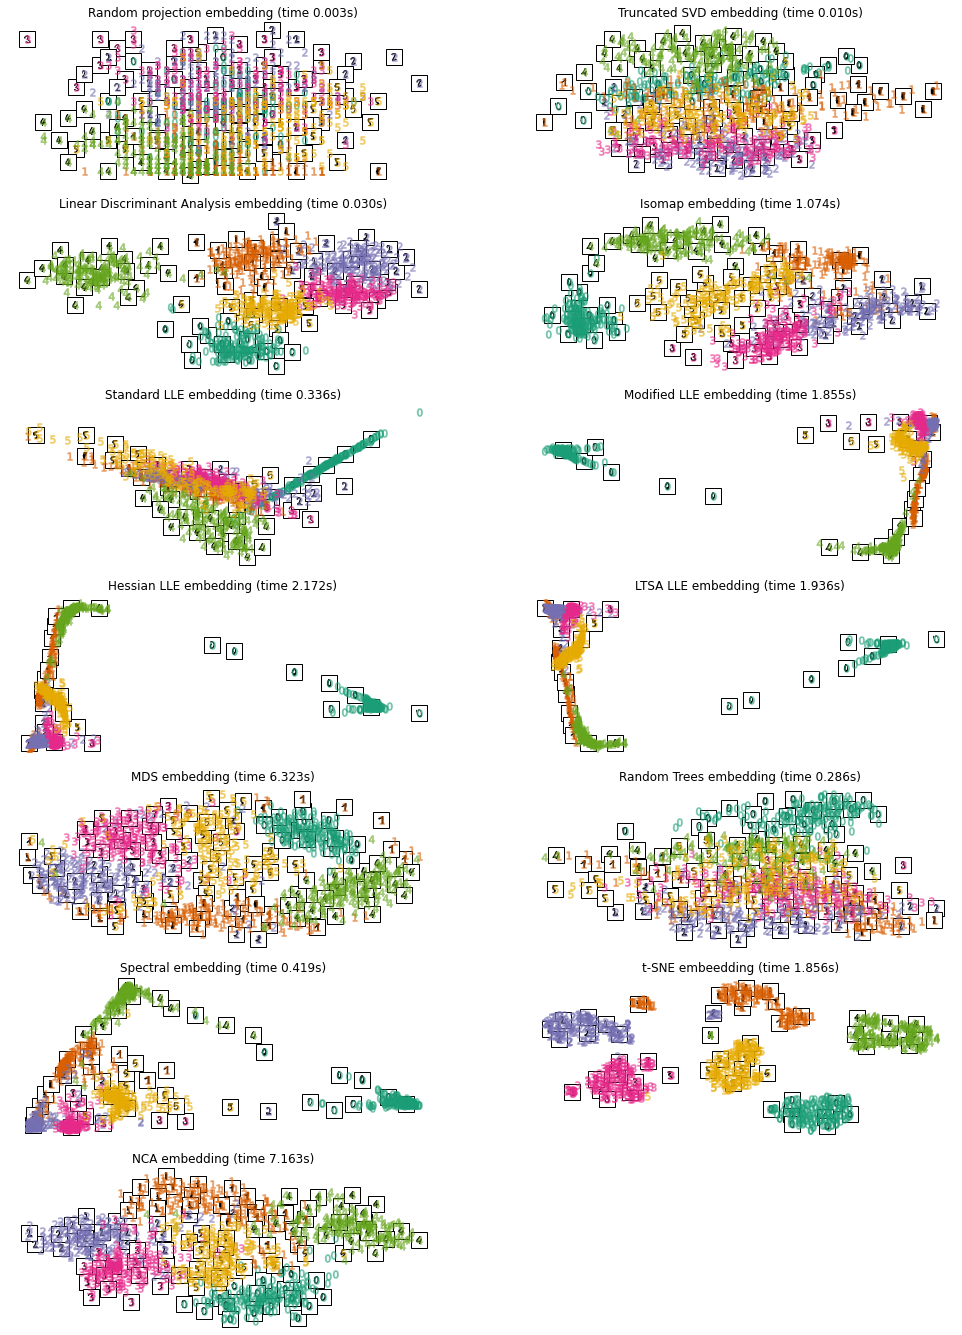

In [ ]:
from itertools import zip_longest

fig, axs = plt.subplots(nrows=7, ncols=2, figsize=(17, 24))

for name, ax in zip_longest(timing, axs.ravel()):
    if name is None:
        ax.axis("off")
        continue
    title = f"{name} (time {timing[name]:.3f}s)"
    plot_embedding(projections[name], title, ax)

plt.show()

1. Analyse the results by explaining the models


explanaion

2. Use a classification model (Decision Tree for example) on all the
projections and compute the errors.

explanation

3. Compute the quality of models and highlight the gain.
